## Exercise-3

Wenfeng Zhu-Computer Vision and Deep Learning: Visual Synthesis

### Task-1: Analytical Gradients of the Cross-Entropy Loss

**The derivation of analytical gradient of the cross entropy loss**

There are three functions will be used in the derivation:

1. Cross entropy for single sample\
$$
\mathcal{L}^i = -log[\sigma(Wx^i)_{y^i}]
$$

2. Softmax function\
$$
\sigma\mathcal(z)_i = \frac {e^{z_i}}{\sum_j e^{z_j}}
$$
3. Kronecker-delta
$$
\delta_{mn}=
\begin{cases}
1, &m=n\\
0, &m \neq n
\end{cases}
$$

For the analytical gradient of the cross entropy loss:\
$$
\frac {\partial\mathcal{L}^i} {W_{l,k}} = \frac {\partial\mathcal{L}^i} {\partial p^i_l} * \frac {\partial p^i_l} {\partial s^i_l} * \frac {\partial s^i_l} {\partial W_{l,k}}
$$

Among them: \
$ p^i = \sigma{(s^i_l)} $ is the probability of $x^i$ after normalizing the score function by softmax\
$ s^i = Wx^i $ is the score function\
$ s^i_l$ is the score of a certain label

For the first item:\
$$
\mathcal{L}^i = -log(p^i_l)   ====>  \frac {\partial\mathcal{L}^i} {\partial p^i_l} = -\frac 1 {p^i_l} 
$$
For the second item,$p^i_l$ is:\
$$
p^i = \sigma(s^i) = \frac {e^{s^i_l}}{\sum e^{s^i}}
$$
Derive this equation: 
$$
\frac {\partial p^i} {\partial s^i_l} = \frac {\frac {\partial e^{s^i}} {\partial s^i_l}*\sum e^{s^i}-e^{s^i_l}*\frac {\partial \sum e^{s^i}} {\partial s^i_l}}{(\sum e^{s^i})^2}=
\begin{cases}
\frac {e^{s^i_l}}{\sum e^{s^i}}*(1-\frac {e^{s^i_l}}{\sum e^{s^i}}) = p^i_l*(1-p^i_l), &\mathcal l\text{ correspond to the real label}\\
\frac {e^{s^i_l}}{\sum e^{s^i}}*\frac {e^{s^i_m}}{\sum e^{s^i}}= p^i_l*(0-p^i_l), &\mathcal l\text{ don't correspond to the real label}
\end{cases}
$$
For the third item, about scores function, it's a linear function of the input, so we can get:\
$$
\frac {\partial s^{lk}} {\partial W_{l,k}} = x^i_k
$$

In summary:
$$
\frac {\partial\mathcal{L}^i} {W_{l,k}} = \frac {\partial\mathcal{L}^i} {\partial p^i_l} * \frac {\partial p^i_l} {\partial s^i_l} * \frac {\partial s^i_l} {\partial W_{l,k}} = x^i_k*(p^i_l-\delta_{ly^i}) = x^i_k*(\sigma(Wx^i)_l-\delta_{ly^i})
$$

### Task 2: Data Preparation and Visualization

1. **Import some necessary libraries:**

In [1]:
import random
import matplotlib.pyplot as plt

from torchvision import datasets, transforms
import torch
import torch.nn as nn
import numpy as np
from tqdm.auto import tqdm  # Not needed but very cool!

The max of train dataset is:
 [[  0   0   0   0   0   0   0   0   0   0   0   0 116 254 216   9   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  16  47 157 254 255 254 255 255 255 255 255 255 255 255
  255 255 244 255 184 197   0   0   0   0]
 [  0   0  64  29 134  62 234 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 165   0   0]
 [  0   0 141 101  96 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 192 121   0]
 [  0  38 144 101 254 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 254 221  63]
 [  0   0  95 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255  93]
 [  0   7 210 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 254 253]
 [ 47 191 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 253]
 [191 252 255 255 255 255 255 255 

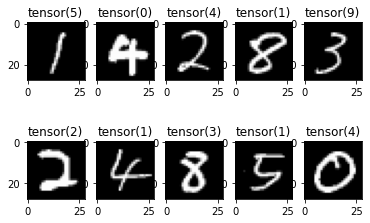

In [4]:
def load_data(train=True):
    mnist = datasets.MNIST('../data',
                           train=train,
                           download=True)
    return mnist

def plot_examples(data):
    #########################
    #### Your Code here  ####
    #########################
    train_numpy = data.data.numpy()
    print("The max of train dataset is:\n", train_numpy.max(axis=0))
    print("\nThe min of train dataset is:\n", train_numpy.min(axis=0))
    print("\nThe mean of train dataset is:\n", train_numpy.mean(axis=0))
    print("\nThe shape of train dataset is:\n", data.data.shape)
    print("\nThe dtype of train dataset is:\n", data.data.type())
    # Plot some examples and put their corresponding label on top as title.
    print("\n10 example of digits with their labels")
    start = random.randint(0, 59989)
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(data.data[start + i].numpy(), cmap="gray")
        plt.title(data.targets[i])
    plt.show()
    

data = load_data()
# subtask 1
plot_examples(data)